Purpose

The FED Funds rate has signicant impacts on the economy. It is the primary tool used in Monetary Policy.

The FRED website describes the Federal Funds Rate as below:


The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.(2)

The Federal Open Market Committee (FOMC) meets eight times a year to determine the federal funds target rate. As previously stated, this rate influences the effective federal funds rate through open market operations or by buying and selling of government bonds (government debt).(2) More specifically, the Federal Reserve decreases liquidity by selling government bonds, thereby raising the federal funds rate because banks have less liquidity to trade with other banks. Similarly, the Federal Reserve can increase liquidity by buying government bonds, decreasing the federal funds rate because banks have excess liquidity for trade. Whether the Federal Reserve wants to buy or sell bonds depends on the state of the economy. If the FOMC believes the economy is growing too fast and inflation pressures are inconsistent with the dual mandate of the Federal Reserve, the Committee may set a higher federal funds rate target to temper economic activity. In the opposing scenario, the FOMC may set a lower federal funds rate target to spur greater economic activity. Therefore, the FOMC must observe the current state of the economy to determine the best course of monetary policy that will maximize economic growth while adhering to the dual mandate set forth by Congress. In making its monetary policy decisions, the FOMC considers a wealth of economic data, such as: trends in prices and wages, employment, consumer spending and income, business investments, and foreign exchange markets.

The federal funds rate is the central interest rate in the U.S. financial market. It influences other interest rates such as the prime rate, which is the rate banks charge their customers with higher credit ratings. Additionally, the federal funds rate indirectly influences longer- term interest rates such as mortgages, loans, and savings, all of which are very important to consumer wealth and confidence.(2)



The above definition describes the primary determinants of monetary policy as: trends in prices and wages, employment, consumer spending and income, business investments, and foreign exchange markets.

So this will be the starting point for data used to predict the Fed Funds Rate changes.

Acronyms:



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

To first dataset we will use is historical data for the Federal Funds Rate. This comes from FRED(Federal Reserve of Economic Data.)

This is just a starting point to understand how it has changed over time. Ultimately, we will be trying to predict whether or not the FED changes the Federal Funds Rate.

https://fred.stlouisfed.org/series/BOGZ1FL072052006Q

In [82]:
root_dir = '/content/drive/MyDrive/Economic Data/'

FFR = pd.read_csv(root_dir + 'DFF.csv')
FFR

,DATE,DFF
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88
...,...,...
25186,2023-06-15,5.07
25187,2023-06-16,5.08
25188,2023-06-17,5.08
25189,2023-06-18,5.08


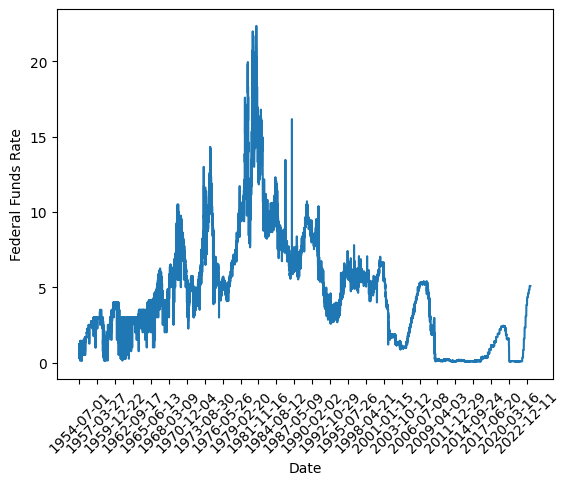

In [85]:
n = 1000  # Reduce number of points to make the graph more legible
x = np.arange(len(FFR['DATE']))
x= x[::n]
y = FFR['DFF'][::n]

plt.plot(FFR['DATE'], FFR['DFF'])
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate')
plt.xticks(x, FFR['DATE'][::n], rotation=45)
plt.show()

Recently the FED has been increasing the Federal Funds Rate to combat inflation. The below chart shows Federal Funds Rate for just 2023.

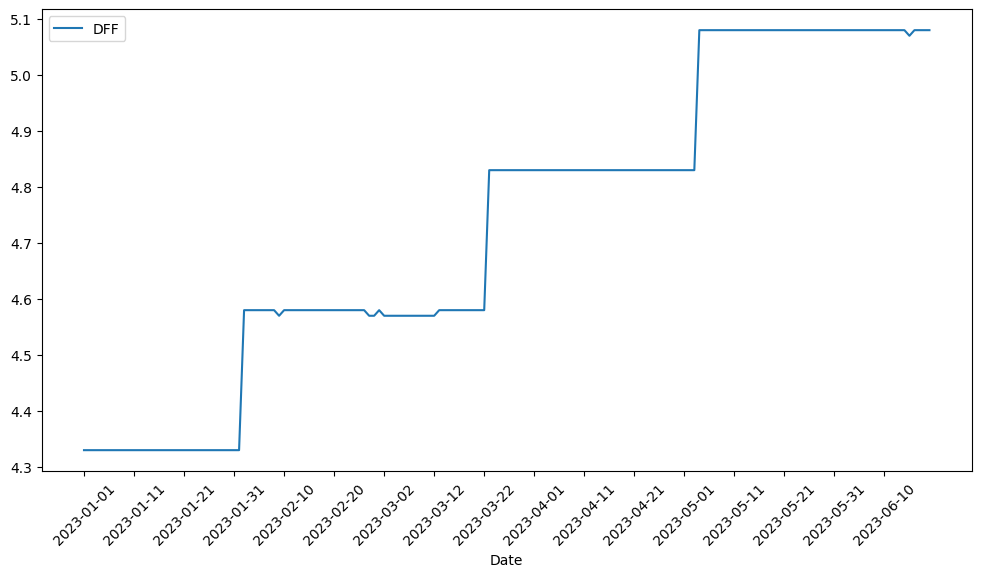

In [88]:
# Filter data for 2023
start_date = '2023-01-01'
end_date = '2023-06-20'
filtered_data = FFR[(FFR['DATE'] >= start_date) & (FFR['DATE'] <= end_date)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DATE'], filtered_data['DFF'], label='DFF')
plt.legend()
plt.xlabel('Date')

x = np.arange(len(filtered_data['DATE']))
x_ticks = x[::10]

plt.xticks(x_ticks, filtered_data['DATE'].iloc[x_ticks], rotation=45)

plt.show()

The next piece of data we will use is the unemployment rate. The FED's goal with the Federal Funds Rate is to keep unemplyoment at a reasonable level. As unemployment rises, this could influence the FED to lower the Federal Funds Rate. Unemployment data is acquired through FRED.

In [7]:
# Load unemployment data
unemployment_rate = pd.read_csv(root_dir + 'UNRATE.csv')
unemployment_rate

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
900,2023-01-01,3.4
901,2023-02-01,3.6
902,2023-03-01,3.5
903,2023-04-01,3.4


We will also be using inflation as a predictor for whether the FED will change the Federal Funds Rate. A decent measure of inflation is the Consumer Price Index. This data also comes from FRED.

In [8]:
# Load Consumer Price Index
# Growth rate from previous month

CPI = pd.read_csv(root_dir + 'CPI.csv')
CPI

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
912,2023-01-01,300.536
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918


In [10]:
# Merge the data frames

data = pd.merge(FFR, unemployment_rate) # Drops NA
data = pd.merge(data, CPI)
data.rename(columns={'CPIAUCSL':'CPI'}, inplace=True)
data['DATE'] = pd.to_datetime(data['DATE'])
data

,DATE,DFF,UNRATE,CPI
0,1954-07-01,1.13,5.8,26.860
1,1954-08-01,0.25,6.0,26.850
2,1954-09-01,1.44,6.1,26.810
3,1954-10-01,0.50,5.7,26.720
4,1954-11-01,1.38,5.3,26.780
...,...,...,...,...
822,2023-01-01,4.33,3.4,300.536
823,2023-02-01,4.33,3.6,301.648
824,2023-03-01,4.58,3.5,301.808
825,2023-04-01,4.83,3.4,302.918


In [11]:
# Calculate ~ monthly change in CPI

data['CPI_change'] = data['CPI'].pct_change(30)
data

,DATE,DFF,UNRATE,CPI,CPI_change
0,1954-07-01,1.13,5.8,26.860,NaN
1,1954-08-01,0.25,6.0,26.850,NaN
2,1954-09-01,1.44,6.1,26.810,NaN
3,1954-10-01,0.50,5.7,26.720,NaN
4,1954-11-01,1.38,5.3,26.780,NaN
...,...,...,...,...,...
822,2023-01-01,4.33,3.4,300.536,0.163614
823,2023-02-01,4.33,3.6,301.648,0.162819
824,2023-03-01,4.58,3.5,301.808,0.160671
825,2023-04-01,4.83,3.4,302.918,0.163789


<Figure size 640x480 with 0 Axes>

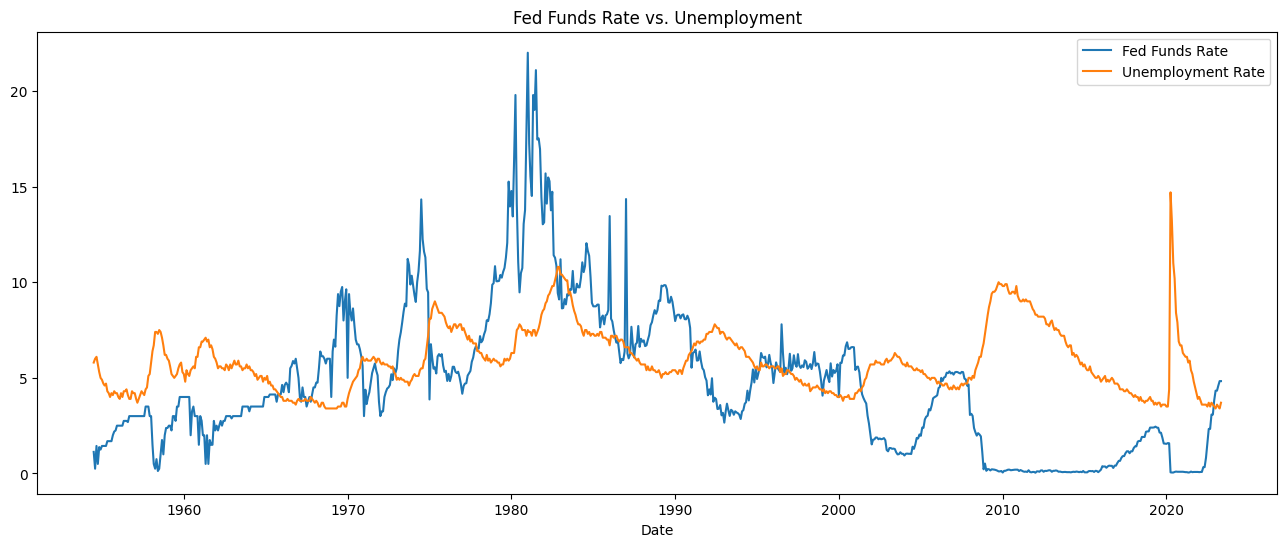

In [110]:
# Compare Fed Funds rate to Unemployment Rate
plt.clf()


plt.figure(figsize=(16, 6))
plt.plot(data['DATE'], data['DFF'], label='Fed Funds Rate')
plt.plot(data['DATE'], data['UNRATE'], label='Unemployment Rate')
plt.title("Fed Funds Rate vs. Unemployment")
plt.xlabel('Date')
plt.legend()



plt.show()

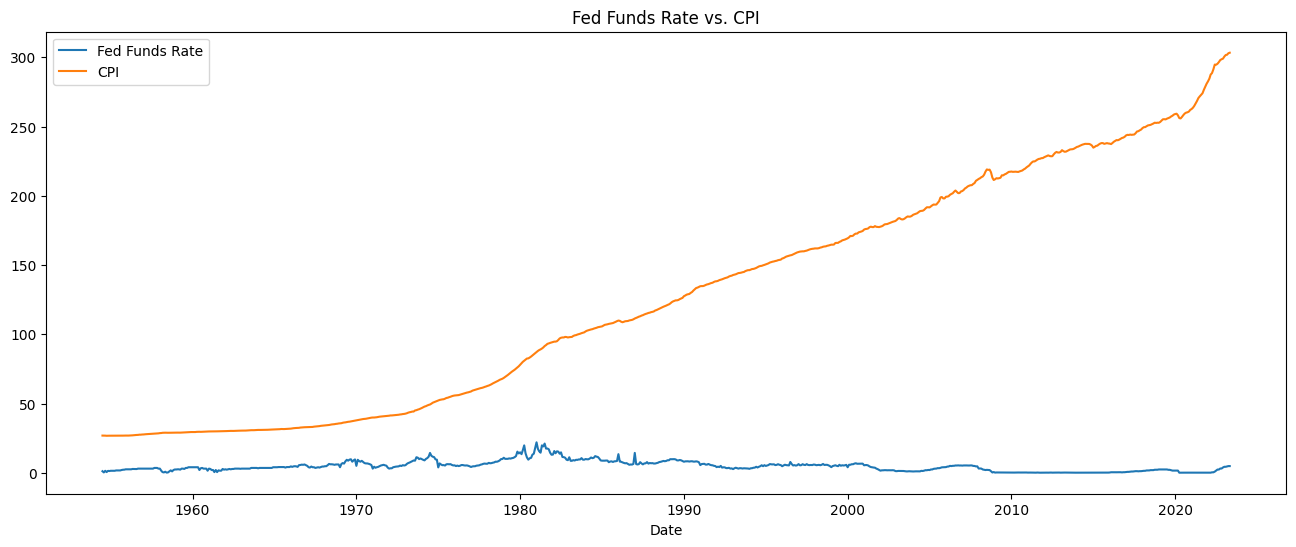

In [112]:
plt.figure(figsize=(16, 6))
plt.plot(data['DATE'], data['DFF'], label='Fed Funds Rate')
plt.plot(data['DATE'], data['CPI'], label='CPI')
plt.title("Fed Funds Rate vs. CPI")
plt.xlabel('Date')
plt.legend()
plt.show()

In [14]:
data['FFR % CHG'] = data['DFF'].pct_change()
data

,DATE,DFF,UNRATE,CPI,CPI_change,FFR % CHG
0,1954-07-01,1.13,5.8,26.860,NaN,NaN
1,1954-08-01,0.25,6.0,26.850,NaN,-0.778761
2,1954-09-01,1.44,6.1,26.810,NaN,4.760000
3,1954-10-01,0.50,5.7,26.720,NaN,-0.652778
4,1954-11-01,1.38,5.3,26.780,NaN,1.760000
...,...,...,...,...,...,...
822,2023-01-01,4.33,3.4,300.536,0.163614,0.130548
823,2023-02-01,4.33,3.6,301.648,0.162819,0.000000
824,2023-03-01,4.58,3.5,301.808,0.160671,0.057737
825,2023-04-01,4.83,3.4,302.918,0.163789,0.054585


It's time to start training a model. First, the data needs to be split into a training and test set. Training set will consist of all data before 2020 and test set will be all data after.

In [16]:
# Create train and test set

train = data[data["DATE"] < '2020-01-01']
test = data[data["DATE"] > '2020-01-01']

train

,DATE,DFF,UNRATE,CPI,CPI_change,FFR % CHG
0,1954-07-01,1.13,5.8,26.860,NaN,NaN
1,1954-08-01,0.25,6.0,26.850,NaN,-0.778761
2,1954-09-01,1.44,6.1,26.810,NaN,4.760000
3,1954-10-01,0.50,5.7,26.720,NaN,-0.652778
4,1954-11-01,1.38,5.3,26.780,NaN,1.760000
...,...,...,...,...,...,...
781,2019-08-01,2.14,3.7,256.059,0.049396,-0.104603
782,2019-09-01,2.13,3.5,256.511,0.051740,-0.004673
783,2019-10-01,1.88,3.6,257.244,0.053445,-0.117371
784,2019-11-01,1.57,3.6,257.803,0.056552,-0.164894


In [17]:
# Split datasets into data and labels(label is the Fed Funds Rate)

train = train.drop('DATE', axis=1)
test = test.drop('DATE', axis=1)
train_X, train_y = train.drop('DFF', axis=1), train[['DFF']]
test_X, test_y = test.drop('DFF', axis=1), test[['DFF']]


In [19]:
train_X

,UNRATE,CPI,CPI_change,FFR % CHG
0,5.8,26.860,NaN,NaN
1,6.0,26.850,NaN,-0.778761
2,6.1,26.810,NaN,4.760000
3,5.7,26.720,NaN,-0.652778
4,5.3,26.780,NaN,1.760000
...,...,...,...,...
781,3.7,256.059,0.049396,-0.104603
782,3.5,256.511,0.051740,-0.004673
783,3.6,257.244,0.053445,-0.117371
784,3.6,257.803,0.056552,-0.164894


Now that the data is setup for training, we will create the model. XGBoost was chosen for this example.

In [20]:
model = xgb.XGBRegressor(n_estimators=100)
model.fit(train_X, train_y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Now that the model is trained it can be used for predictions.

In [21]:
# Make predictions
predictions = model.predict(test_X)
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 7.33338419729003


In [22]:
test_y

,DFF
787,1.59
788,1.58
789,0.06
790,0.05
791,0.05
792,0.08
793,0.10
794,0.09
795,0.09
796,0.09


In [23]:
predictions

array([1.8660331, 1.5826195, 1.6959321, 1.8931787, 1.4541155, 1.322549 ,
       1.2769339, 1.271727 , 1.2387087, 1.2218996, 1.2492886, 1.3158203,
       1.2918061, 1.2904657, 1.3680348, 1.2707977, 1.9547762, 2.2578115,
       1.6862813, 2.1288922, 2.0515945, 2.0228102, 2.2948904, 4.4404535,
       5.78871  , 5.701392 , 6.3039274, 5.6963344, 6.2723165, 6.0122333,
       5.9483776, 5.4324236, 5.9159484, 5.421229 , 5.897107 , 5.4664273,
       5.421229 , 5.5913477, 5.3548546, 5.421229 ], dtype=float32)

While this did techincally work, it's not the best approach to this type of problem. The above model tries to predict the actual value of the Fed Funds Rate which is regression problem. Mean Squared Error was used as the evluation metric which can be hard to interpret.

Rather than trying to predict the value of the Fed Funds Rate at any given time, it might make more sense to predict whether the Fed decides to raise rates or not. This turns the problem into a classication problem and is the ultimate goal of this notebook.

The downside of this approach is there is much less data on the Fed's decisions to raise rates or not. Especially when you include the decision to keep rates the same. I felt it was important to keep this decision in the data as it can be just as meaning as raising or lowering the rates.

The data does come from Wikipedia, which is not the ideal place to source data. However, given that there is only about 23 years of data, it was relatively easy to spot check for accuracy.

In [25]:
# Need data on only rate changes
tables = pd.read_html('https://en.wikipedia.org/wiki/History_of_Federal_Open_Market_Committee_actions')
FFR_Action = tables[1]
FFR_Action.rename(columns={'Date': 'DATE'}, inplace=True)
FFR_Action

,DATE,Fed. Funds Rate,Discount Rate,Votes,Notes
0,"June 14, 2023",5.00%–5.25%,5.25%,11–0,Official statement
1,"May 3, 2023",5.00%–5.25%,5.25%,11–0,Official statement
2,"March 22, 2023",4.75%–5.00%,5.00%,11–0,Official statement
3,"February 1, 2023",4.50%–4.75%,4.75%,12–0,Official statement
4,"December 14, 2022",4.25%–4.50%,4.50%,12–0,Official statement
...,...,...,...,...,...
107,"August 22, 2000",6.50%,6.00%,NaN,Official statement
108,"June 28, 2000",6.50%,6.00%,NaN,Official statement
109,"May 16, 2000",6.50%,6.00%,NaN,Official statement
110,"March 21, 2000",6.00%,5.50%,NaN,Official statement


In [26]:
FFR_Action = FFR_Action[['DATE', 'Discount Rate']]
FFR_Action['DATE'] = pd.to_datetime(FFR_Action['DATE'])
FFR_Action['DATE'] = FFR_Action['DATE'].to_numpy().astype('datetime64[M]')
FFR_Action

<ipython-input-26-fe2a8130c9a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FFR_Action['DATE'] = pd.to_datetime(FFR_Action['DATE'])
<ipython-input-26-fe2a8130c9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FFR_Action['DATE'] = FFR_Action['DATE'].to_numpy().astype('datetime64[M]')


,DATE,Discount Rate
0,2023-06-01,5.25%
1,2023-05-01,5.25%
2,2023-03-01,5.00%
3,2023-02-01,4.75%
4,2022-12-01,4.50%
...,...,...
107,2000-08-01,6.00%
108,2000-06-01,6.00%
109,2000-05-01,6.00%
110,2000-03-01,5.50%


This data frame contains the discount rate after each Fed Meeting. This can be used to create another column(FFR_Action) with three categories. One category for each decision, raising, lowering, or keeping rates the same.

In [27]:
# Create FFR_Action column
FFR_Action['FFR_Change'] = 0  # Initialize the new column with zeros

# Use shift() to compare the values with the previous row
FFR_Action['FFR_Change'] [FFR_Action['Discount Rate'] > FFR_Action['Discount Rate'].shift()] = 1
FFR_Action['FFR_Change'] [FFR_Action['Discount Rate'] < FFR_Action['Discount Rate'].shift()] = 2
FFR_Action

<ipython-input-27-0f4bec32163b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FFR_Action['FFR_Change'] = 0  # Initialize the new column with zeros
<ipython-input-27-0f4bec32163b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FFR_Action['FFR_Change'] [FFR_Action['Discount Rate'] > FFR_Action['Discount Rate'].shift()] = 1
<ipython-input-27-0f4bec32163b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,DATE,Discount Rate,FFR_Change
0,2023-06-01,5.25%,0
1,2023-05-01,5.25%,0
2,2023-03-01,5.00%,2
3,2023-02-01,4.75%,2
4,2022-12-01,4.50%,2
...,...,...,...
107,2000-08-01,6.00%,0
108,2000-06-01,6.00%,0
109,2000-05-01,6.00%,0
110,2000-03-01,5.50%,2


In [28]:
# Merge this data with the original DF
data2 = pd.merge(data, FFR_Action, on='DATE', how='left').fillna('na')
data2['DATE'] = pd.to_datetime(data2['DATE'])
data2.tail(50)

,DATE,DFF,UNRATE,CPI,CPI_change,FFR % CHG,Discount Rate,FFR_Change
787,2019-08-01,2.14,3.7,256.059,0.049396,-0.104603,na,na
788,2019-09-01,2.13,3.5,256.511,0.05174,-0.004673,2.75%,0.0
789,2019-10-01,1.88,3.6,257.244,0.053445,-0.117371,2.75%,0.0
790,2019-11-01,1.57,3.6,257.803,0.056552,-0.164894,na,na
791,2019-12-01,1.56,3.6,258.616,0.059194,-0.006369,na,na
792,2020-01-01,1.55,3.5,259.037,0.060571,-0.00641,na,na
793,2020-02-01,1.59,3.5,259.248,0.057365,0.025806,na,na
794,2020-03-01,1.58,4.4,258.124,0.047432,-0.006289,0.25%,0.0
795,2020-03-01,1.58,4.4,258.124,0.047432,-0.006289,0.25%,0.0
796,2020-03-01,1.58,4.4,258.124,0.047432,-0.006289,0.25%,0.0


In [29]:
start_date = '2022-01-01 00:00:00'
end_date = '2023-01-01 00:00:00'
ex = data2[(data2['DATE'] >= start_date) & (data2['DATE'] < end_date)]
print(ex)

          DATE   DFF  UNRATE      CPI CPI_change FFR % CHG Discount Rate  \
820 2022-01-01  0.07     4.0  282.599   0.105262    -0.125            na   
821 2022-02-01  0.08     3.8  284.610   0.111502  0.142857            na   
822 2022-03-01  0.08     3.6  287.472     0.1207       0.0         0.50%   
823 2022-04-01  0.33     3.6  288.611   0.121935     3.125            na   
824 2022-05-01  0.33     3.6  291.268   0.129808       0.0         1.00%   
825 2022-06-01  0.83     3.6  294.728   0.139636  1.515152         1.75%   
826 2022-07-01  1.58     3.5  294.628   0.137397  0.903614         2.50%   
827 2022-08-01  2.33     3.7  295.320   0.139141  0.474684            na   
828 2022-09-01  2.33     3.5  296.539   0.148824       0.0         3.25%   
829 2022-10-01  3.08     3.7  297.987   0.163594  0.321888            na   
830 2022-11-01  3.08     3.6  298.598      0.167       0.0         4.00%   
831 2022-12-01  3.83     3.5  298.990   0.163449  0.243506         4.50%   

    FFR_Cha

In [30]:
# Create list with dates where the FFR_Rate could have changed.
target_dates = FFR_Action['DATE'].values.tolist()
target_dates = pd.to_datetime(target_dates)
target_dates = [pd.to_datetime(date).replace(day=1) for date in target_dates]
target_dates = target_dates[::-1]
print(target_dates)

[Timestamp('2000-02-01 00:00:00'), Timestamp('2000-03-01 00:00:00'), Timestamp('2000-05-01 00:00:00'), Timestamp('2000-06-01 00:00:00'), Timestamp('2000-08-01 00:00:00'), Timestamp('2000-10-01 00:00:00'), Timestamp('2000-11-01 00:00:00'), Timestamp('2000-12-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2001-03-01 00:00:00'), Timestamp('2001-04-01 00:00:00'), Timestamp('2001-05-01 00:00:00'), Timestamp('2001-06-01 00:00:00'), Timestamp('2001-08-01 00:00:00'), Timestamp('2001-09-01 00:00:00'), Timestamp('2001-10-01 00:00:00'), Timestamp('2001-11-01 00:00:00'), Timestamp('2001-12-01 00:00:00'), Timestamp('2002-01-01 00:00:00'), Timestamp('2002-03-01 00:00:00'), Timestamp('2002-05-01 00:00:00'), Timestamp('2002-06-01 00:00:00'), Timestamp('2002-08-01 00:00:00'), Timestamp('2002-09-01 00:00:00'), Timestamp('2002-11-01 00:00:00'), Timestamp('2002-12-01 00:00:00'), Timestamp('2003-01-01 00:00:00'), Timestamp('2003-01-01 00:00:00'), Timestamp('20

The cell block above create a list of dates where the Fed could have changed the FFR. These are the decision dates we will use to predict. The strategy is to use all the predictor data between these dates to determine the decision on these dates. The mean between these dates is used for Unemployment Rate. The percent change is used for Inflation(CPI).

In [31]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Date Range', 'UNRATE_Mean', 'CPI_CHG', 'FFR_CHG'])

# Step 3: Iterate over each pair of consecutive dates
for i in range(len(target_dates) - 1):
    start_date = target_dates[i]
    end_date = target_dates[i + 1]
    #print('start', start_date)
    #print('end', end_date)
    # Step 4: Filter the DataFrame based on the current pair of dates
    filtered_df = data2[(data2['DATE'] >= start_date) & (data2['DATE'] < end_date)]
    #print('filter', filtered_df)
    # Step 5: Calculate the mean of the desired column
    unrate_mean_value = filtered_df['UNRATE'].mean()
    CPI_start = data2.loc[data2['DATE'] == start_date, 'CPI'].values
    CPI_end = data2.loc[data2['DATE'] == end_date, 'CPI'].values
    CPI_CHG = (CPI_end - CPI_start) / CPI_start
    try:
      CPI_CHG = CPI_CHG[0]
    except:
      pass
    print(CPI_CHG)

    FFR_CHG = data2.loc[data2['DATE'] == end_date, 'FFR_Change'].values
    try:
      FFR_CHG = FFR_CHG[0]
    except:
      pass
    # Step 6: Append a new row to the result DataFrame
    result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)


# Print the result DataFrame
#print(result_df)

<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ig

0.0058823529411764705
0.0011695906432747873
0.0058411214953271035
0.0029036004645760743
0.006948465547191761
0.0017251293847037547
0.0022962112514351646
0.00572737686139748
0.0
0.0028473804100227792
0.001703577512776896
0.005102040816326562
0.002256063169768625
-0.0016882386043893245
0.003945885005636914
-0.002807411566535654
-0.0005630630630630311
-0.0005633802816901088
0.0016910935738443233
0.004501969611705185
0.0056022408963585435
0.0005571030640668207
0.005011135857461056
0.001662049861495908
0.0038716814159291406
0.0016528925619835337
0.0044004400440043065
0.0
0.007119386637458989
-0.00543773790103317
0.0010934937124110913
0.007646095030038262
0.0032520325203251725
-0.00108049702863311
0.003244997295835556
0.004312668463611921
0.004294149221685362
0.005879208979155502
0.003719447396386913
0.001588141874007321
0.0031712473572939894


<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ig

0.010010537407797561
0.0
0.0036515388628065577
0.003638253638253579
0.002589331952356292
0.0005165289256198053
0.01239029426948893
0.013768485466598762
-0.003521126760563466
0.0
0.006057546693589183
0.002007024586051065
0.008012018027040674
0.0024838549428713363
0.009910802775024777
-0.004906771344455348
-0.004437869822485235
0.005943536404160419
0.0016592811422945224
0.00909863987376927
0.007146058220646041
0.0023167517109623148
0.0020894254803748066
0.0
0.004237553390765001
0.0030832378312802425
0.010779673980591785
0.003447705076970434
0.0
0.0060045057358583094
0.0
0.0023143810202016406
0.014270222770657455
0.0
-0.02579322104195953
0.06342538718436322
0.05762746545910689


<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ig

0.020507989115119824
0.00517233562894363
0.0011111475571155061
0.014916264954149465
0.007150783882488212
0.0057737692175160475
0.004637117656901048
0.0023197531941217373
0.011544228479192325
0.003230537575532479
0.0028575772578953887
0.0034208766773957617
0.0
0.0
0.0
0.0
-0.007872185461251333
0.003490932945972563
0.0050275112262926
0.00438674606431822
0.002382319947881913
0.003015048321533336
0.10221499695183903
0.013204764290087356
0.011879094167570886
-0.0003392958931625863
0.006486145240778207
0.006943437456793292
0.0013128018272057947
0.008889929429077946
0.0005304195618733363
0.004923660075279615
[]


<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ignore_index=True)
<ipython-input-31-477e329ed5df>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG}, ig

In [32]:
result_df

,Date Range,UNRATE_Mean,CPI_CHG,FFR_CHG
0,2000-02-01 00:00:00 - 2000-03-01 00:00:00,4.10,0.005882,2.0
1,2000-03-01 00:00:00 - 2000-05-01 00:00:00,3.90,0.00117,0.0
2,2000-05-01 00:00:00 - 2000-06-01 00:00:00,4.00,0.005841,0.0
3,2000-06-01 00:00:00 - 2000-08-01 00:00:00,4.00,0.002904,0.0
4,2000-08-01 00:00:00 - 2000-10-01 00:00:00,4.00,0.006948,0.0
...,...,...,...,...
106,2022-11-01 00:00:00 - 2022-12-01 00:00:00,3.60,0.001313,2.0
107,2022-12-01 00:00:00 - 2023-02-01 00:00:00,3.45,0.00889,2.0
108,2023-02-01 00:00:00 - 2023-03-01 00:00:00,3.60,0.00053,2.0
109,2023-03-01 00:00:00 - 2023-05-01 00:00:00,3.45,0.004924,0.0


In [33]:
result_df.drop(result_df.tail(1).index,inplace=True)
result_df

,Date Range,UNRATE_Mean,CPI_CHG,FFR_CHG
0,2000-02-01 00:00:00 - 2000-03-01 00:00:00,4.10,0.005882,2.0
1,2000-03-01 00:00:00 - 2000-05-01 00:00:00,3.90,0.00117,0.0
2,2000-05-01 00:00:00 - 2000-06-01 00:00:00,4.00,0.005841,0.0
3,2000-06-01 00:00:00 - 2000-08-01 00:00:00,4.00,0.002904,0.0
4,2000-08-01 00:00:00 - 2000-10-01 00:00:00,4.00,0.006948,0.0
...,...,...,...,...
105,2022-09-01 00:00:00 - 2022-11-01 00:00:00,3.60,0.006943,2.0
106,2022-11-01 00:00:00 - 2022-12-01 00:00:00,3.60,0.001313,2.0
107,2022-12-01 00:00:00 - 2023-02-01 00:00:00,3.45,0.00889,2.0
108,2023-02-01 00:00:00 - 2023-03-01 00:00:00,3.60,0.00053,2.0


Below cells are to clean the data.

In [34]:
# Replace nan in UNRATE_Mean column with previous value

result_df['UNRATE_Mean'].fillna(method='ffill', inplace=True)
result_df.dtypes

Date Range      object
UNRATE_Mean    float64
CPI_CHG         object
FFR_CHG         object
dtype: object

In [35]:
# Change CPI_CHG column from object to float64

result_df['CPI_CHG'] = result_df['CPI_CHG'].astype('float64')
result_df['FFR_CHG'] = result_df['FFR_CHG'].astype('Int64')
result_df.dtypes

Date Range      object
UNRATE_Mean    float64
CPI_CHG        float64
FFR_CHG          Int64
dtype: object

Now that our problem is classification the model used will be Random Forrest.

In [36]:
# Initialize random forrest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [37]:
# Split data in train and test sets
from sklearn.model_selection import train_test_split

# Split data in train and test sets
train, test = train_test_split(result_df, test_size=0.20)

print(len(train))
print(len(test))

88
22


To get a baseline model, the only predictors used will be Unemployment Rate and Inflation.

In [38]:
# Create list of predictors to use to predict target
predictors = ["UNRATE_Mean", "CPI_CHG"]

In [39]:
# Train random forrest
rf.fit(train[predictors], train["FFR_CHG"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [40]:
# Generate predictions on test data
preds = rf.predict(test[predictors])

from sklearn.metrics import accuracy_score

acc = accuracy_score(test["FFR_CHG"], preds)
acc

0.5454545454545454

In [41]:
# Compare how accuracies on win vs loss predictions
combined = pd.DataFrame(dict(actual=test["FFR_CHG"], prediction=preds))

pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0.0,1.0,2.0
actual,,,
0,7,1,2
1,2,3,0
2,3,2,2


54% accuracy is not great, but randomly guessing would be 33% accurate and given the limited amount of data, this is a decent result.

One of the more interesting factors the Fed lists in their determination of Fed Funds Rate is foreign exchange markets. The thought of this factor as a predcitor of the  FFR seems rather tenious, but it's worth exploring. When the Fed increases the FFR, it increaes foreign interest in investing in US interest rate products. This in turn increases the demand for USD, which leads to a stronger US currency.

The data for the strength of the USD will be based on the US Dollar Index(USDX).

In [42]:
USDX = pd.read_csv(root_dir + 'USDX.csv')
USDX['Date'] = pd.to_datetime(USDX['Date'])
USDX

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-01-04,120.529999,120.529999,120.529999,120.529999,120.529999,0.0
1,1971-01-05,120.519997,120.519997,120.519997,120.519997,120.519997,0.0
2,1971-01-06,120.489998,120.489998,120.489998,120.489998,120.489998,0.0
3,1971-01-07,120.550003,120.550003,120.550003,120.550003,120.550003,0.0
4,1971-01-08,120.529999,120.529999,120.529999,120.529999,120.529999,0.0
...,...,...,...,...,...,...,...
16282,2023-06-19,NaN,NaN,NaN,NaN,NaN,NaN
16283,2023-06-20,102.480003,102.790001,102.320000,102.540001,102.540001,0.0
16284,2023-06-21,102.500000,102.709999,102.019997,102.070000,102.070000,0.0
16285,2023-06-22,102.029999,102.470001,101.919998,102.389999,102.389999,0.0


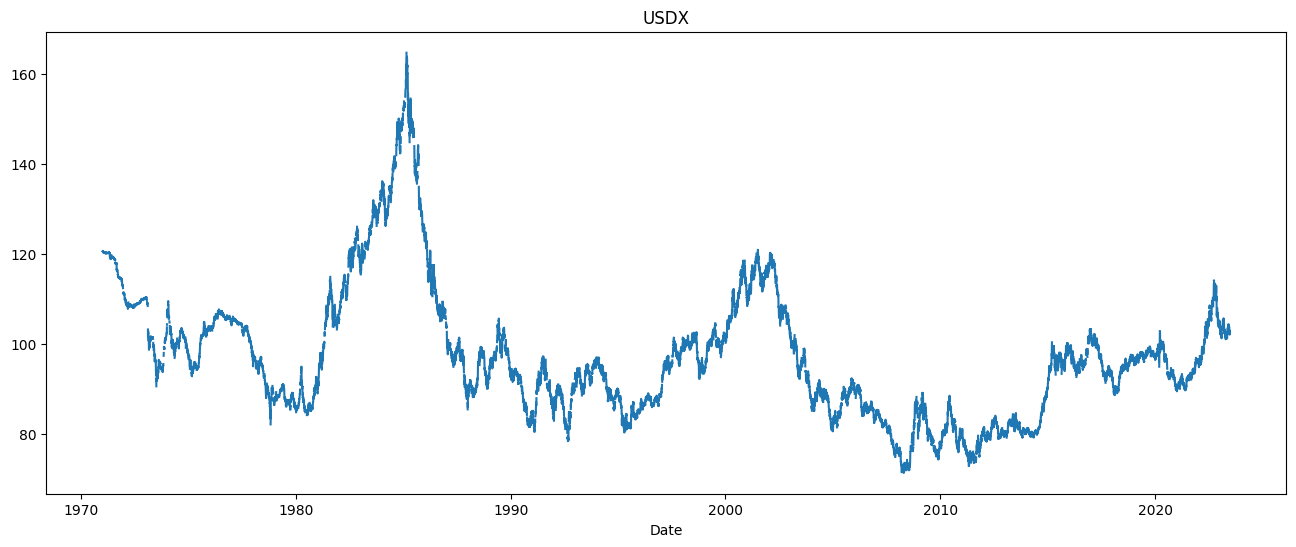

In [114]:

plt.figure(figsize=(16, 6))
plt.plot(USDX['Date'], USDX['Adj Close'], label='USDX')
plt.title("USDX")
plt.xlabel('Date')
plt.show()

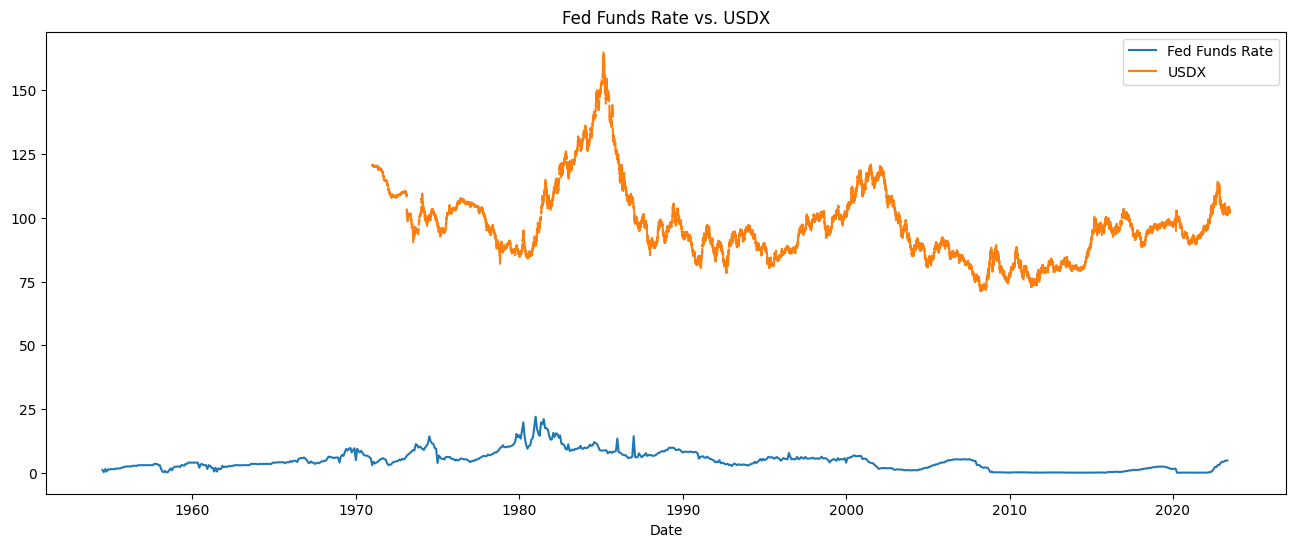

In [115]:
# Plot USDX vs FFR
plt.figure(figsize=(16, 6))
plt.plot(data['DATE'], data['DFF'], label='Fed Funds Rate')
plt.plot(USDX['Date'], USDX['Adj Close'], label='USDX')
plt.title("Fed Funds Rate vs. USDX")
plt.xlabel('Date')
plt.legend()
plt.show()

In [45]:
# Reduce to only monthly adj close values

# Create a mask to filter rows with the first day of the month
mask = USDX['Date'].dt.day == 1

# Apply the mask to the dataframe
filtered_USDX = USDX[mask]
filtered_USDX = filtered_USDX[['Date', 'Adj Close']]
filtered_USDX.rename(columns={'Date': 'DATE'}, inplace=True)
filtered_USDX['Adj Close'].fillna(method='ffill', inplace=True)
filtered_USDX

,DATE,Adj Close
24,1971-02-01,120.260002
48,1971-03-01,120.250000
75,1971-04-01,120.180000
127,1971-06-01,119.690002
153,1971-07-01,119.169998
...,...,...
16140,2023-01-01,104.730003
16167,2023-02-01,101.220001
16190,2023-03-01,104.480003
16241,2023-05-01,102.150002


In [46]:
data2 = pd.merge(data2, filtered_USDX, on='DATE', how='left')
data2['Adj Close'].fillna(method='ffill', inplace=True)
data2

,DATE,DFF,UNRATE,CPI,CPI_change,FFR % CHG,Discount Rate,FFR_Change,Adj Close
0,1954-07-01,1.13,5.8,26.860,na,na,na,na,NaN
1,1954-08-01,0.25,6.0,26.850,na,-0.778761,na,na,NaN
2,1954-09-01,1.44,6.1,26.810,na,4.76,na,na,NaN
3,1954-10-01,0.50,5.7,26.720,na,-0.652778,na,na,NaN
4,1954-11-01,1.38,5.3,26.780,na,1.76,na,na,NaN
...,...,...,...,...,...,...,...,...,...
832,2023-01-01,4.33,3.4,300.536,0.163614,0.130548,na,na,104.730003
833,2023-02-01,4.33,3.6,301.648,0.162819,0.0,4.75%,2.0,101.220001
834,2023-03-01,4.58,3.5,301.808,0.160671,0.057737,5.00%,2.0,104.480003
835,2023-04-01,4.83,3.4,302.918,0.163789,0.054585,na,na,104.480003


Below we are using the same process as before to aggregate the data between the decision dates. The US Doller Index will use mean between decision dates, similar to Unemployment.

In [47]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Date Range', 'UNRATE_Mean', 'CPI_CHG', 'FFR_CHG', 'USDX_Mean'])

# Iterate over each pair of consecutive dates
for i in range(len(target_dates) - 1):
    start_date = target_dates[i]
    end_date = target_dates[i + 1]
    filtered_df = data2[(data2['DATE'] >= start_date) & (data2['DATE'] < end_date)]
    unrate_mean_value = filtered_df['UNRATE'].mean()
    CPI_start = data2.loc[data2['DATE'] == start_date, 'CPI'].values
    CPI_end = data2.loc[data2['DATE'] == end_date, 'CPI'].values
    CPI_CHG = (CPI_end - CPI_start) / CPI_start
    try:
      CPI_CHG = CPI_CHG[0]
    except:
      pass

    FFR_CHG = data2.loc[data2['DATE'] == end_date, 'FFR_Change'].values
    try:
      FFR_CHG = FFR_CHG[0]
    except:
      pass

    USDX_Mean = filtered_df['Adj Close'].mean()

    result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean}, ignore_index=True)

0.0058823529411764705
0.0011695906432747873
0.0058411214953271035
0.0029036004645760743
0.006948465547191761
0.0017251293847037547
0.0022962112514351646
0.00572737686139748
0.0
0.0028473804100227792
0.001703577512776896
0.005102040816326562
0.002256063169768625
-0.0016882386043893245
0.003945885005636914
-0.002807411566535654
-0.0005630630630630311
-0.0005633802816901088
0.0016910935738443233
0.004501969611705185
0.0056022408963585435
0.0005571030640668207
0.005011135857461056
0.001662049861495908
0.0038716814159291406
0.0016528925619835337
0.0044004400440043065
0.0
0.007119386637458989
-0.00543773790103317
0.0010934937124110913
0.007646095030038262
0.0032520325203251725
-0.00108049702863311
0.003244997295835556
0.004312668463611921
0.004294149221685362
0.005879208979155502
0.003719447396386913
0.001588141874007321


<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean}, ignore_index=True)
<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean}, ignore_index=True)
<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_va

0.0031712473572939894
0.010010537407797561
0.0
0.0036515388628065577
0.003638253638253579
0.002589331952356292
0.0005165289256198053
0.01239029426948893
0.013768485466598762
-0.003521126760563466
0.0
0.006057546693589183
0.002007024586051065
0.008012018027040674
0.0024838549428713363
0.009910802775024777
-0.004906771344455348
-0.004437869822485235
0.005943536404160419
0.0016592811422945224
0.00909863987376927
0.007146058220646041
0.0023167517109623148
0.0020894254803748066
0.0
0.004237553390765001
0.0030832378312802425
0.010779673980591785
0.003447705076970434
0.0
0.0060045057358583094
0.0
0.0023143810202016406
0.014270222770657455
0.0
-0.02579322104195953
0.06342538718436322
0.05762746545910689


<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean}, ignore_index=True)
<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean}, ignore_index=True)
<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_va

0.020507989115119824
0.00517233562894363
0.0011111475571155061
0.014916264954149465
0.007150783882488212
0.0057737692175160475
0.004637117656901048
0.0023197531941217373
0.011544228479192325
0.003230537575532479
0.0028575772578953887
0.0034208766773957617
0.0
0.0
0.0
0.0
-0.007872185461251333
0.003490932945972563
0.0050275112262926
0.00438674606431822
0.002382319947881913
0.003015048321533336
0.10221499695183903
0.013204764290087356
0.011879094167570886
-0.0003392958931625863
0.006486145240778207
0.006943437456793292
0.0013128018272057947
0.008889929429077946
0.0005304195618733363
0.004923660075279615
[]


<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean}, ignore_index=True)
<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean}, ignore_index=True)
<ipython-input-47-82ab89d8406c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_va

In [48]:
result_df

,Date Range,UNRATE_Mean,CPI_CHG,FFR_CHG,USDX_Mean
0,2000-02-01 00:00:00 - 2000-03-01 00:00:00,4.10,0.005882,2.0,104.919998
1,2000-03-01 00:00:00 - 2000-05-01 00:00:00,3.90,0.00117,0.0,104.889999
2,2000-05-01 00:00:00 - 2000-06-01 00:00:00,4.00,0.005841,0.0,109.629997
3,2000-06-01 00:00:00 - 2000-08-01 00:00:00,4.00,0.002904,0.0,109.050003
4,2000-08-01 00:00:00 - 2000-10-01 00:00:00,4.00,0.006948,0.0,110.735001
...,...,...,...,...,...
106,2022-11-01 00:00:00 - 2022-12-01 00:00:00,3.60,0.001313,2.0,111.480003
107,2022-12-01 00:00:00 - 2023-02-01 00:00:00,3.45,0.00889,2.0,104.730003
108,2023-02-01 00:00:00 - 2023-03-01 00:00:00,3.60,0.00053,2.0,101.220001
109,2023-03-01 00:00:00 - 2023-05-01 00:00:00,3.45,0.004924,0.0,104.480003


In [49]:
result_df['UNRATE_Mean'].fillna(method='ffill', inplace=True)
result_df['USDX_Mean'].fillna(method='ffill', inplace=True)
result_df.drop(result_df.tail(1).index,inplace=True)

result_df['CPI_CHG'] = result_df['CPI_CHG'].astype('float64')
result_df['FFR_CHG'] = result_df['FFR_CHG'].astype('Int64')
result_df.dtypes

Date Range      object
UNRATE_Mean    float64
CPI_CHG        float64
FFR_CHG          Int64
USDX_Mean      float64
dtype: object

In [50]:
# Split data in train and test sets
train, test = train_test_split(result_df, test_size=0.20)

print(len(train))
print(len(test))

88
22


In [51]:
# Create list of predictors to use to predict target
predictors = ["UNRATE_Mean", "CPI_CHG", 'USDX_Mean']

In [52]:
# Train random forrest
rf.fit(train[predictors], train["FFR_CHG"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [53]:
# Generate predictions on test data
preds = rf.predict(test[predictors])

from sklearn.metrics import accuracy_score

acc = accuracy_score(test["FFR_CHG"], preds)
acc

0.6363636363636364

Accuracy has improved some, but the model is still suffering from a lack of data.

I had a college professor once describe the Chairman of the Fed as one of the most influential positions a person can have. Referring to the Chairman he said:

"When he speaks, markets move."

The next section will look at the stock market following Fed Rate Decisions. The S&P500 and Rusell 2000 indexes will be used as proxies for the stock market. It is expected that the stock market and FFR will be inversely correlated.

In [54]:
# Look at stocks  immediately following rate decisions
sp500 = pd.read_csv(root_dir + 'SPY.csv')
sp500.rename(columns={'Adj Close': 'sp500_adj_close'}, inplace=True)
RUT = pd.read_csv(root_dir + '^RUT.csv')
RUT.rename(columns={'Adj Close': 'RUT_adj_close'}, inplace=True)
indices_combined = pd.merge(sp500, RUT, on='Date', how='left')
indices_combined = indices_combined[['Date', 'sp500_adj_close', 'RUT_adj_close']]
indices_combined['Date'] = pd.to_datetime(indices_combined['Date'])
indices_combined.rename(columns={'Date': 'DATE'}, inplace=True)
indices_combined

,DATE,sp500_adj_close,RUT_adj_close
0,1993-01-29,25.029375,228.100006
1,1993-02-01,25.207378,229.029999
2,1993-02-02,25.260799,229.699997
3,1993-02-03,25.527828,231.960007
4,1993-02-04,25.634634,232.360001
...,...,...,...
7650,2023-06-16,439.459991,1875.469971
7651,2023-06-20,437.179993,1866.699951
7652,2023-06-21,434.940002,1863.010010
7653,2023-06-22,436.510010,1848.180054


In [55]:
data3 = pd.merge(data2, indices_combined, on='DATE', how='left')
data3['sp500_adj_close'].fillna(method='ffill', inplace=True)
data3['RUT_adj_close'].fillna(method='ffill', inplace=True)
data3

,DATE,DFF,UNRATE,CPI,CPI_change,FFR % CHG,Discount Rate,FFR_Change,Adj Close,sp500_adj_close,RUT_adj_close
0,1954-07-01,1.13,5.8,26.860,na,na,na,na,NaN,NaN,NaN
1,1954-08-01,0.25,6.0,26.850,na,-0.778761,na,na,NaN,NaN,NaN
2,1954-09-01,1.44,6.1,26.810,na,4.76,na,na,NaN,NaN,NaN
3,1954-10-01,0.50,5.7,26.720,na,-0.652778,na,na,NaN,NaN,NaN
4,1954-11-01,1.38,5.3,26.780,na,1.76,na,na,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
832,2023-01-01,4.33,3.4,300.536,0.163614,0.130548,na,na,104.730003,402.481018,1881.680054
833,2023-02-01,4.33,3.6,301.648,0.162819,0.0,4.75%,2.0,101.220001,407.723602,1960.810059
834,2023-03-01,4.58,3.5,301.808,0.160671,0.057737,5.00%,2.0,104.480003,391.783875,1898.430054
835,2023-04-01,4.83,3.4,302.918,0.163789,0.054585,na,na,104.480003,391.783875,1898.430054


In [56]:
# Normalize indices
data3['sp500_adj_close'] = (data3['sp500_adj_close'] - data3['sp500_adj_close'].min()) / (data3['sp500_adj_close'].max() - data3['sp500_adj_close'].min())
data3['RUT_adj_close'] = (data3['RUT_adj_close'] - data3['RUT_adj_close'].min()) / (data3['RUT_adj_close'].max() - data3['RUT_adj_close'].min())
data3['DFF'] = (data3['DFF'] - data3['DFF'].min()) / (data3['DFF'].max() - data3['DFF'].min())
data3.dropna(inplace=True)
data3

,DATE,DFF,UNRATE,CPI,CPI_change,FFR % CHG,Discount Rate,FFR_Change,Adj Close,sp500_adj_close,RUT_adj_close
463,1993-02-01,0.146175,7.1,143.100,0.087386,0.221805,na,na,93.559998,0.000000,0.003090
464,1993-03-01,0.164390,7.0,143.300,0.081509,0.123077,na,na,94.180000,0.000042,0.000000
465,1993-04-01,0.148907,7.1,143.800,0.077961,-0.093151,na,na,91.099998,0.001340,0.002917
466,1993-05-01,0.135246,7.1,144.200,0.078534,-0.090634,na,na,91.099998,0.001340,0.002917
467,1993-06-01,0.149818,7.0,144.300,0.075261,0.106312,na,na,89.019997,0.002187,0.004991
...,...,...,...,...,...,...,...,...,...,...,...
832,2023-01-01,0.195355,3.4,300.536,0.163614,0.130548,na,na,104.730003,0.892902,0.776915
833,2023-02-01,0.195355,3.6,301.648,0.162819,0.0,4.75%,2.0,101.220001,0.905310,0.813966
834,2023-03-01,0.206740,3.5,301.808,0.160671,0.057737,5.00%,2.0,104.480003,0.867585,0.784758
835,2023-04-01,0.218124,3.4,302.918,0.163789,0.054585,na,na,104.480003,0.867585,0.784758


In [57]:
data3.dtypes

DATE               datetime64[ns]
DFF                       float64
UNRATE                    float64
CPI                       float64
CPI_change                 object
FFR % CHG                  object
Discount Rate              object
FFR_Change                 object
Adj Close                 float64
sp500_adj_close           float64
RUT_adj_close             float64
dtype: object

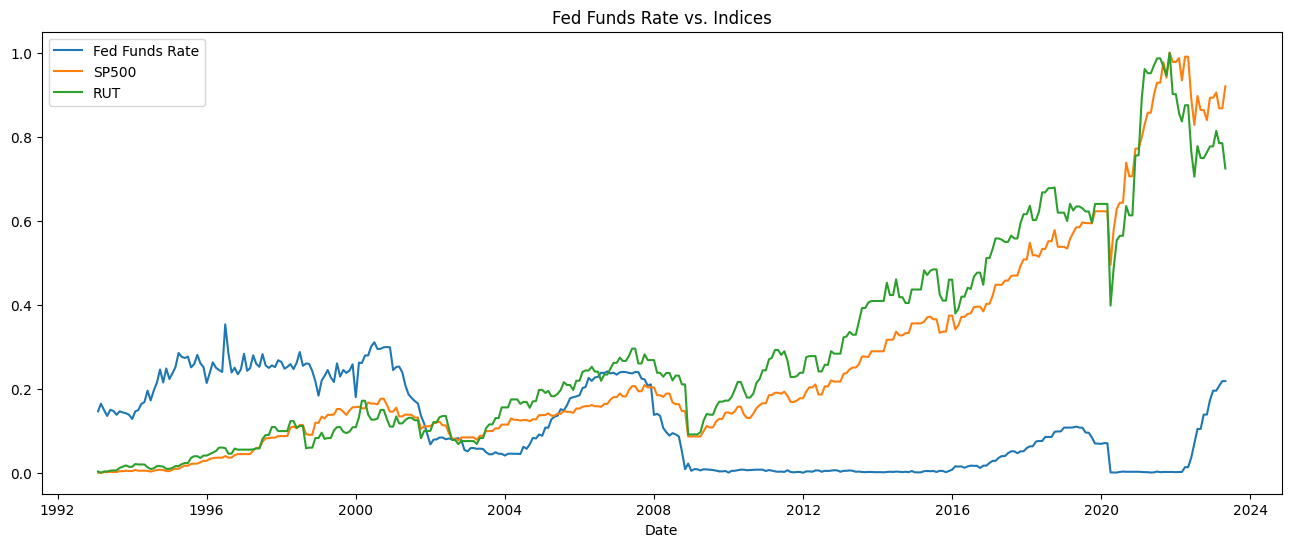

In [116]:
plt.figure(figsize=(16, 6))
plt.plot(data3['DATE'], data3['DFF'], label='Fed Funds Rate')
plt.plot(data3['DATE'], data3['sp500_adj_close'], label='SP500')
plt.plot(data3['DATE'], data3['RUT_adj_close'], label='RUT')
plt.title("Fed Funds Rate vs. Indices")
plt.xlabel('Date')
plt.legend()
plt.show()

Looking at the graph above, it seems that the FFR is more reactionary to the indices, rather than the other way around. There certainly is some level of correlation here. It's worth adding it as a predictor to see if we can improve accuracy further.

It's important to note that with much of economic data, the correlation can be bidirectional.

The below cell follows the same process as before to add the S&P500 data to our dataset. We will use the change in the S&P500 between the decision dates as our predictor.

In [59]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Date Range', 'UNRATE_Mean', 'CPI_CHG', 'FFR_CHG', 'USDX_Mean', 'SP500_CHG'])

# Iterate over each pair of consecutive dates
for i in range(len(target_dates) - 1):
    start_date = target_dates[i]
    end_date = target_dates[i + 1]
    filtered_df = data3[(data3['DATE'] >= start_date) & (data3['DATE'] < end_date)]
    unrate_mean_value = filtered_df['UNRATE'].mean()
    CPI_start = data3.loc[data3['DATE'] == start_date, 'CPI'].values
    CPI_end = data3.loc[data3['DATE'] == end_date, 'CPI'].values
    CPI_CHG = (CPI_end - CPI_start) / CPI_start
    try:
      CPI_CHG = CPI_CHG[0]
    except:
      pass


    FFR_CHG = data3.loc[data2['DATE'] == end_date, 'FFR_Change'].values
    try:
      FFR_CHG = FFR_CHG[0]
    except:
      pass

    USDX_Mean = filtered_df['Adj Close'].mean()

    SP500_start = data3.loc[data3['DATE'] == start_date, 'sp500_adj_close'].values
    SP500_end = data3.loc[data3['DATE'] == end_date, 'sp500_adj_close'].values
    SP500_CHG = (SP500_end - SP500_start) / SP500_start
    try:
      SP500_CHG = SP500_CHG[0]
    except:
      pass



    # Append a new row to the result DataFrame
    result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)



-0.02446532138976575
0.09027509339045836
-0.016143872626979194
-0.010301787116069912
0.0819022980055826
-0.08490360186156445
-0.0985579715133235
0.0
0.0
-0.0771915596109535
0.0
0.03237292405553457
-0.0036036173044578556
-0.048289950227177164
0.0
-0.20779969877447438
0.06397923217524319
0.0
0.0
0.07972037450293831
-0.05597954315387994
0.0
-0.28128299550833735
0.0
0.03704063082896511
0.0
0.0
0.0
0.0
0.046468079756126796
0.0
0.1271779744562935
0.0
0.06440325210079322
0.0846265808897113


<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_da

0.0
0.12875141053116576
-0.024925965437985205
-0.013855207704104096
0.008433205307043654
-0.02116949265086016
0.035545955658056065
0.07862579333085204
0.0029100592600855312
0.027978594656956818
-0.03916931228097687
0.037632092045908117
0.04310687596842069
-0.013189964547944707
-0.0171351592800462
0.07299509148398449
0.0
0.03693118480307144
0.016473201540875313
-0.017546811976592677
-0.010134894747859618
0.045578484235808216
0.0
0.09773480639448297
0.0
0.010188949776618668
0.08271079830224388
0.047421377570724774
-0.05873848693362561
0.0
0.0
0.07680900399620837
-0.02724445579050763
0.0
0.0


<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_da

-0.09172399838499296
0.0
-0.02174425575391417
-0.18790128941495018
0.0
-0.41153361360644025
1.1778573105954162
0.9906372667592362
0.07494607039399004
0.11308984951158678
0.021924418998658705
0.11012728637689101
0.01947319131263034
0.029144263567022946
0.03463200042094748
-0.02411639009290425
0.10819913597392998
-0.003050634801711596
-0.0009174178503101756
0.04841117837609576
0.0
0.0
0.0
0.0
-0.20519701560057046
0.27041319865904057
0.02270635007498001
0.0
0.14809070906485367
-0.043560564433753494
0.3234779174975624
0.06023952636693928
-0.10143023390800023
-0.06956470777046507
0.04268589376666345
-0.027832952014261236


<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_da

0.06367590514141432
0.013895972164925208
-0.04167072139664329
0.06052866231628589
[]


<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_date} - {end_date}', 'UNRATE_Mean': unrate_mean_value, 'CPI_CHG': CPI_CHG, 'FFR_CHG': FFR_CHG, 'USDX_Mean': USDX_Mean, 'SP500_CHG': SP500_CHG}, ignore_index=True)
<ipython-input-59-c9928e9bb400>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Date Range': f'{start_da

In [60]:
result_df

,Date Range,UNRATE_Mean,CPI_CHG,FFR_CHG,USDX_Mean,SP500_CHG
0,2000-02-01 00:00:00 - 2000-03-01 00:00:00,4.10,0.005882,2.0,104.919998,-0.024465
1,2000-03-01 00:00:00 - 2000-05-01 00:00:00,3.90,0.00117,0.0,104.889999,0.090275
2,2000-05-01 00:00:00 - 2000-06-01 00:00:00,4.00,0.005841,0.0,109.629997,-0.016144
3,2000-06-01 00:00:00 - 2000-08-01 00:00:00,4.00,0.002904,0.0,109.050003,-0.010302
4,2000-08-01 00:00:00 - 2000-10-01 00:00:00,4.00,0.006948,0.0,110.735001,0.081902
...,...,...,...,...,...,...
106,2022-11-01 00:00:00 - 2022-12-01 00:00:00,3.60,0.001313,2.0,111.480003,0.063676
107,2022-12-01 00:00:00 - 2023-02-01 00:00:00,3.45,0.00889,2.0,104.730003,0.013896
108,2023-02-01 00:00:00 - 2023-03-01 00:00:00,3.60,0.00053,2.0,101.220001,-0.041671
109,2023-03-01 00:00:00 - 2023-05-01 00:00:00,3.45,0.004924,0.0,104.480003,0.060529


In [61]:
result_df['UNRATE_Mean'].fillna(method='ffill', inplace=True)
result_df['USDX_Mean'].fillna(method='ffill', inplace=True)
result_df.drop(result_df.tail(1).index,inplace=True)

result_df['CPI_CHG'] = result_df['CPI_CHG'].astype('float64')
result_df['FFR_CHG'] = result_df['FFR_CHG'].astype('Int64')
result_df['SP500_CHG'] = result_df['SP500_CHG'].astype('float64')
result_df.dtypes

Date Range      object
UNRATE_Mean    float64
CPI_CHG        float64
FFR_CHG          Int64
USDX_Mean      float64
SP500_CHG      float64
dtype: object

In [62]:
# Split data in train and test sets
train, test = train_test_split(result_df, test_size=0.20)

print(len(train))
print(len(test))

88
22


In [63]:
# Create list of predictors to use to predict target
predictors = ["UNRATE_Mean", "CPI_CHG", 'USDX_Mean', 'SP500_CHG']

# Train random forrest
rf.fit(train[predictors], train["FFR_CHG"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [64]:
# Generate predictions on test data
preds = rf.predict(test[predictors])

from sklearn.metrics import accuracy_score

acc = accuracy_score(test["FFR_CHG"], preds)
acc

0.6818181818181818

Small improvement once again.

Another market that could be influenced by Fed Rates decisions is the US Treasury Market. The next section will explore this relationship.

In [65]:
# Look at treasuries  immediately following rate decisions
# 'https://www.macrotrends.net/2521/30-year-treasury-bond-rate-yield-chart'

In [66]:
one_yr_treasury_yield = pd.read_csv(root_dir + 'DGS1.csv')
ten_yr_treasury_yield = pd.read_csv(root_dir + 'DGS10.csv')
treasury_yields = pd.merge(one_yr_treasury_yield, ten_yr_treasury_yield, on='DATE', how='left')

In [67]:
treasury_yields

,DATE,DGS1,DGS10
0,1962-01-02,3.22,4.06
1,1962-01-03,3.24,4.03
2,1962-01-04,3.24,3.99
3,1962-01-05,3.26,4.02
4,1962-01-08,3.31,4.03
...,...,...,...
16034,2023-06-19,.,.
16035,2023-06-20,5.24,3.74
16036,2023-06-21,5.25,3.72
16037,2023-06-22,5.29,3.80


In [68]:
treasury_yields['DATE'] = pd.to_datetime(treasury_yields['DATE'])
treasury_yields.replace('.', np.nan, inplace=True)
treasury_yields['DGS1'] = treasury_yields['DGS1'].astype(float)
treasury_yields['DGS10'] = treasury_yields['DGS10'].astype(float)
treasury_yields.fillna(method='ffill', inplace=True)
treasury_yields

,DATE,DGS1,DGS10
0,1962-01-02,3.22,4.06
1,1962-01-03,3.24,4.03
2,1962-01-04,3.24,3.99
3,1962-01-05,3.26,4.02
4,1962-01-08,3.31,4.03
...,...,...,...
16034,2023-06-19,5.24,3.77
16035,2023-06-20,5.24,3.74
16036,2023-06-21,5.25,3.72
16037,2023-06-22,5.29,3.80


In [69]:
treasury_yields['yield_diff'] = treasury_yields['DGS10'] - treasury_yields['DGS1']
treasury_yields = treasury_yields[treasury_yields['DATE'] > '2000-01-01']
treasury_yields

,DATE,DGS1,DGS10,yield_diff
9914,2000-01-03,6.09,6.58,0.49
9915,2000-01-04,6.00,6.49,0.49
9916,2000-01-05,6.05,6.62,0.57
9917,2000-01-06,6.03,6.57,0.54
9918,2000-01-07,6.00,6.52,0.52
...,...,...,...,...
16034,2023-06-19,5.24,3.77,-1.47
16035,2023-06-20,5.24,3.74,-1.50
16036,2023-06-21,5.25,3.72,-1.53
16037,2023-06-22,5.29,3.80,-1.49


In [70]:
data4 = pd.merge(treasury_yields, FFR_Action, on='DATE', how='left').fillna('na')
data4

,DATE,DGS1,DGS10,yield_diff,Discount Rate,FFR_Change
0,2000-01-03,6.09,6.58,0.49,na,na
1,2000-01-04,6.00,6.49,0.49,na,na
2,2000-01-05,6.05,6.62,0.57,na,na
3,2000-01-06,6.03,6.57,0.54,na,na
4,2000-01-07,6.00,6.52,0.52,na,na
...,...,...,...,...,...,...
6125,2023-06-19,5.24,3.77,-1.47,na,na
6126,2023-06-20,5.24,3.74,-1.50,na,na
6127,2023-06-21,5.25,3.72,-1.53,na,na
6128,2023-06-22,5.29,3.80,-1.49,na,na


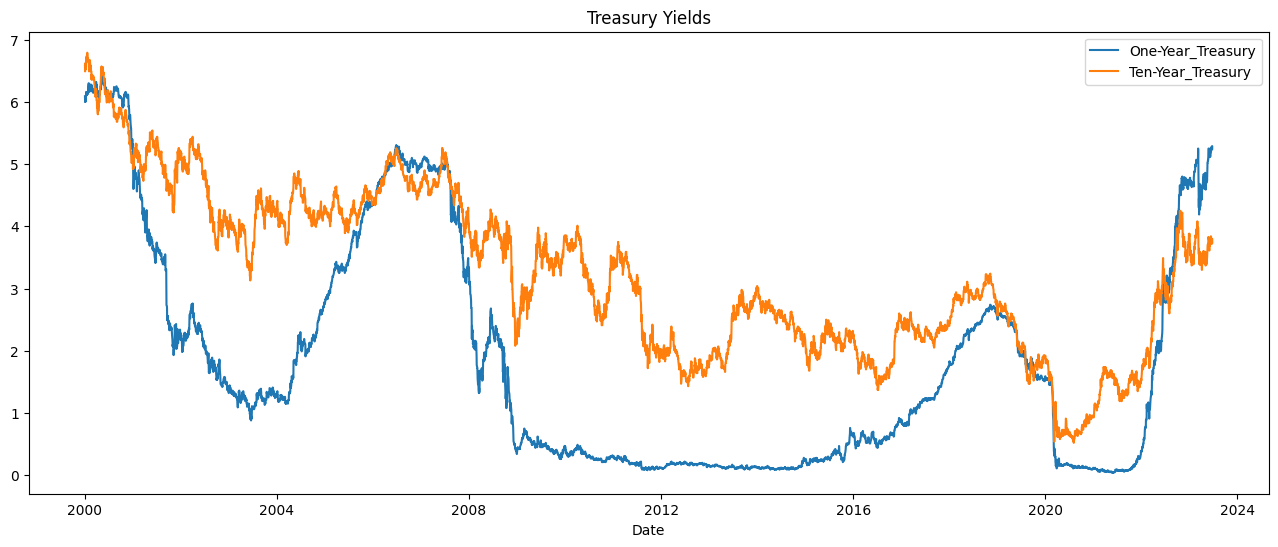

In [117]:
plt.figure(figsize=(16, 6))
plt.plot(data4['DATE'], data4['DGS1'], label='One-Year_Treasury')
plt.plot(data4['DATE'], data4['DGS10'], label='Ten-Year_Treasury')

plt.title("Treasury Yields")
plt.xlabel('Date')
plt.legend()
plt.show()

To compare the treasury yields with the rate decisions we will use 2 plots, that share the date as their x-axis.

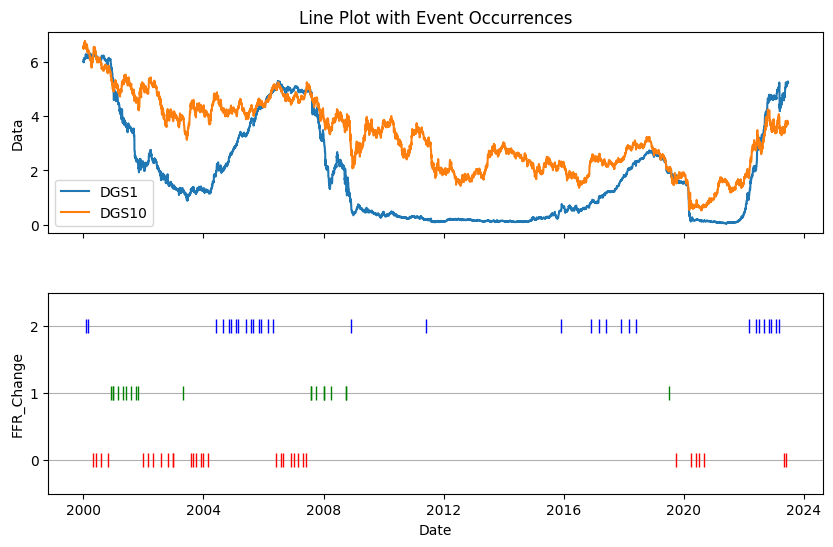

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


data4['DATE'] = pd.to_datetime(data4['DATE'])
data4 = data4.sort_values('DATE')
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(data4['DATE'], data4['DGS1'], label='DGS1')
ax1.plot(data4['DATE'], data4['DGS10'], label='DGS10')
ax1.set_ylabel('Data')
ax1.set_title('Line Plot with Event Occurrences')
ax1.legend()

# Plot the FFR_Change on the bottom subplot
for event_value, color in colors.items():
    event_dates = data4.loc[data4['FFR_Change'] == event_value, 'DATE']
    ax2.plot(event_dates, [event_value] * len(event_dates), '|', color=color, markersize=10)

ax2.set_xlabel('Date')
ax2.set_ylabel('FFR_Change')
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels(['0', '1', '2'])
ax2.grid(axis='y')
ax2.set_ylim(-0.5, 2.5)
plt.subplots_adjust(hspace=0.3)

plt.show()


There are 3 main ways I can think of to improve the accuracy of the model.



1.   Get more data on rate decisions going farther back in time. This has proven more challenging than anticipated. The value of the Federal Funds Rate is easy to obtain data for, but the actual decision(including no rate change) is harder to find data on.
2.   Increase the number of predictors. There are almost certainly more data sources that could be used as predictors.
3.   Use time series models that can take in all the data between the decision dates to make the prediction, rather than using mean or percent change.


It will be interesting to see what this model predicts for future rate decisions.



In [118]:
# Other future ideas

# Other Predictors
  # Public sentiment
  # Fed sentiment

# Fiscal Policy

# Compare to overall interest rates

# Yield Curve

# FFR vs. Stock Market
  # Small cap vs large cap